# Workshop 2: Mean and Variance Propagation
**Notebook B (2 of 2): Sewer Pipe Buckling Capacity**
<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px"\>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px"\>
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.2. Wed Sep 13, 2023.*

## Overview

This is one of two notebooks where, together with your group, you will apply the propagation laws for the mean and variance for a function of two independent random variables. You will assesss how well the approximations correspond with the <em>simulation-based</em> equivalents. You will also assess the distribution of the function.

_You do not need to turn in this notebook._

### Application: Sewer Pipe Buckling Capacity

Local buckling of a sewer pipe due to normal stresses can be modelled as:

$$S =20\times 10^9 \frac{T}{R}$$

where $S$ is the stress resulting in buckling, $R$ is the hydraulic radius of the sewer pipe (in $m$), $T$ the wall thickness (in $m$), and the modus of elasticity of concrete equal to $20\times 10^9$.

Both $T$ and $R$ are random variables, as it is known that sewer pipes are susceptible to bending and deformation

The sewer pipe considered here has mean values $\mu_T$, $\mu_R$, and standard deviations $\sigma_T$ and $\sigma_R$; $T$ and $R$ are assumed to be statistically independent.

We are now interested in the expected stress as well as the uncertainty expressed by the standard deviation. This is important for the design of the sewer system.

*Disclaimer: the dimensions of the pipe come from a real case study, but some aspects of the exercise are...less realistic. We would also like to express our sincere regrets for giving you variables in notebooks A and B with the same symbol, and also acknowledge that the use of "S" for stress may be...painfull for some.*

### Programming

We will add one new package this week to our `mude` environment; refer to the package installation [instructions on the website](https://mude.citg.tudelft.nl/software/packages/) and remember to activate your `mude` environment! If you are already using this notebook in Jupyter, simpy start up a new session.

Note also that we can increase the default size of the text in our figures to make them more readable!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import probplot

import ipywidgets as widgets
from ipywidgets import interact

plt.rcParams.update({'font.size': 14})

### Theory: Propagation laws for a function of 2 random variables 

We are interested in the mean and variance of $X$, which is a function of 2 random variables: $X=q(Y_1,Y_2)$. The mean and covariance matrix of $Y$ are assumed to be known:

$$\mu_Y = [\mu_1\;\mu_2]^T$$

$$\Sigma_Y = \begin{bmatrix} \sigma^2_1 & Cov(Y_1,Y_2) \\ Cov(Y_1,Y_2) & \sigma^2_2\end{bmatrix}$$

The second-order Taylor series approximation of the mean $\mu_X$ is then given by:

$$\mu_X=\mathbb{E}(q(Y))\approx q(\mu_Y )+\frac{1}{2}\frac{\partial^2 q(\mu_Y )}{\partial Y_1^2 } \sigma_1^2+\frac{1}{2}\frac{\partial^2 q(\mu_Y )}{\partial Y_2^2 }\sigma_2^2+\frac{\partial^2 q(\mu_Y )}{\partial Y_1 \partial Y_2 } Cov(Y_1,Y_2) $$

In most practical situations, the second-order approximation suffices. 

For the variance $\sigma_X^2$ it is common to use only the first-order approximation, given by:

$$\sigma^2_X \approx \left(\frac{\partial q(\mu_Y )}{\partial Y_1 } \right)^2 \sigma^2_1 +\left(\frac{\partial q(\mu_Y )}{\partial Y_2 } \right)^2 \sigma^2_2 + 2\left(\frac{\partial q(\mu_Y )}{\partial Y_1 } \right) \left(\frac{\partial q(\mu_Y )}{\partial Y_2 } \right)  Cov(Y_1,Y_2)$$

## Task 1: Apply the propagation laws

We are interested to know how the uncertainty in $R$ and $T$ propagates into the uncertainty of the stress $S$. We will first do this analytically and then implement it in code.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   

Use the Taylor series approximation to find the expression for $\mu_S$ and $\sigma_S$ as function of $\mu_R$, $\sigma_R$, $\mu_T$, $\sigma_T$. Write your answer on paper (or using a tablet) and use the Markdown cell below to include an image in the notebook.
</p>
</div>

**Use this Markdown cell to add your answer for Task 1.1.**

Replace the `IMAGE_NAME.jpg` with your image, and remember to include the proper path (e.g., if you put your images in a sub-directory of your working directory, let's say in `MY_SUB_DIR`, you can specify the image location like this `./MY_SUB_DIR/IMAGE_NAME.jpg`. You can also replace `INSERT_YOUR_IMAGE_HERE` with any text you like: try something readable, so you understand what should be there when the image link is broken.

![INSERT_YOUR_IMAGE_HERE](./IMAGE_NAME.jpg)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   

Complete the function below, such that the <code>S_taylor</code> will compute the approximated $\mu_S$ and $\sigma_S$, as found in the previous Task.
</p>
</div>

In [4]:
def S_taylor(mu_R, mu_T, sigma_R, sigma_T):
    """Compute Taylor series approximation of mean and std of S."""
    
    const = 20e9
    
    dSdT = const/mu_R
    dSdR = -(const*mu_T)/(mu_R**2)
    
    dSdT_2 = 0
    dSdR_2 = (2*const*mu_T)/(mu_R**3)
    
    mu_S_0 = const*(mu_T/mu_R)
    mu_S = mu_S_0 + 0.5*dSdT_2*sigma_T**2 + 0.5*dSdR_2*sigma_R**2
    
    #var_S = YOUR_CODE_HERE
    sigma_S = (dSdT**2)*sigma_T**2 + (dSdR**2)*sigma_R**2
    
    return mu_S, sigma_S

Now we use the Taylor approximation and make two plots of $\sigma_S$ as a function of $\sigma_R$ for the following cases:
- $\sigma_T$ = 0.005 $m$
- $\sigma_T$ = 0 $m/m$ (i.e., slope is deterministic, not susceptible to deformation)

We will use $\mu_R = 1.25 m$ and $\mu_T = 0.03 m$, and vary $\sigma_R$ from 0 to 0.25 $m$. 

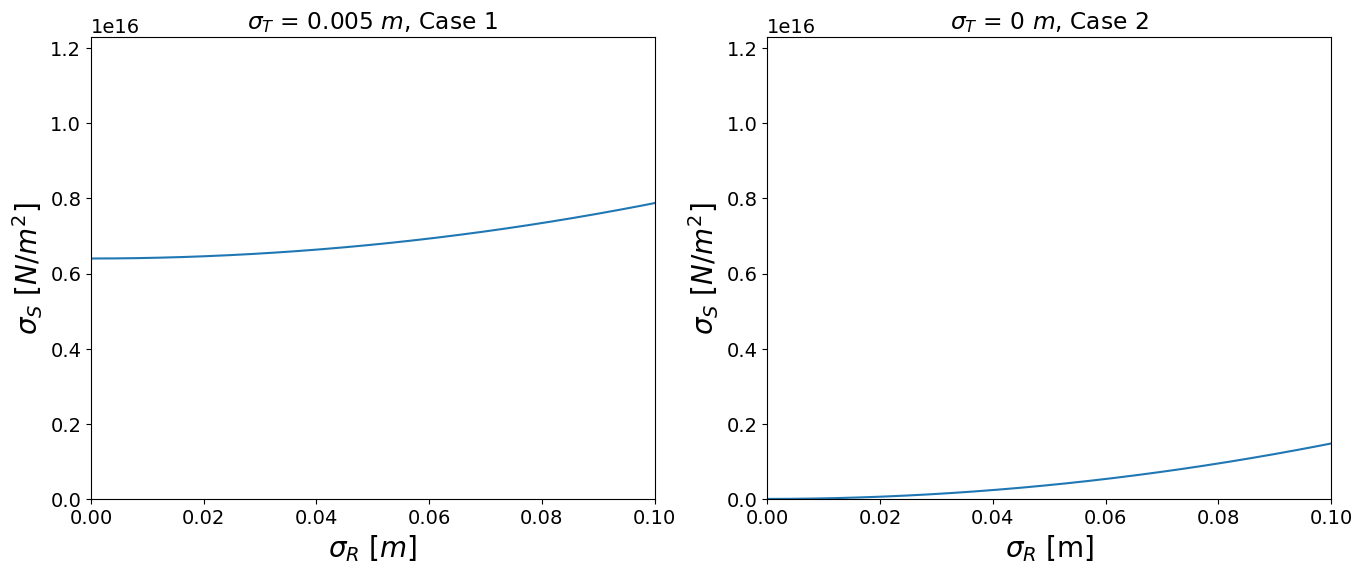

In [5]:
# assign given values
mu_R = 1.25
mu_T = 0.03
sigma_R = np.linspace(0, 0.2, 50)

# case 1 for sigma_T
sigma_T_1 = 0.005
mu_S_1, sigma_S_1 = S_taylor(mu_R, mu_T, sigma_R, sigma_T_1)

# case 2 for sigma_T
sigma_T_2 = 0
mu_S_2, sigma_S_2 = S_taylor(mu_R, mu_T, sigma_R, sigma_T_2)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
# left side plot for case 1 
ax[0].plot(sigma_R, sigma_S_1)
ax[0].set_ylabel('$\sigma_S$ [$N/m^2$]', size = 20)
ax[0].set_xlabel('$\sigma_R$ [$m$]', size = 20)
ax[0].set_title(f'$\sigma_T$ = {sigma_T_1} $m$, Case 1')
ax[0].set_xlim(0, 0.1)
ax[0].set_ylim(0, np.max(sigma_S_1))
# right side plot for case 2
ax[1].plot(sigma_R, sigma_S_2)
ax[1].set_ylabel('$\sigma_S$ [$N/m^2$]', size = 20)
ax[1].set_xlabel('$\sigma_R$ [m]', size = 20)
ax[1].set_title(f'$\sigma_T$ = {sigma_T_2} $m$, Case 2')
ax[1].set_xlim(0, 0.1)
ax[1].set_ylim(0, np.max(sigma_S_1))
plt.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
Interpret the figures above.
</p>
</div>

## Task 2: Simulation-based propagation

We will use again the following values: $\mu_R = 0.5 m$ and $\mu_S = 0.015 m/m$; $\sigma_R$ varies from 0 to 0.1 $m$, and $\sigma_S=0.002 m/m$. Furthermore, it is assumed that $R$ and $S$ are independent normally distributed random variables. We will generate at least 10,000 simulated realizations of $R$ and $S$ using a random number generator, and then you need to use these to calculate the corresponding sample values of $V$. 

Complete the function <code>samples_plot</code> below to plot the empirical probability density function (PDF) of $S$ using your simulated samples, in other words, a histogram. Also plot the normal PDF in the same figure - using the sample mean and sample (or empirical) standard deviation of $S$ from your generated samples. 

We will also assess whether $S$ is normally distributed using the simulated samples for varying $\sigma_R$ with a normal probability plot. 

### Theoretical Quantiles in `probplot`

The method `probplot` is built into `scipy.stats` (Documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)) and _validates_ a probability model by comparing samples (i.e., data) to a theoretical distribution (in this case, Normal). The "Theoretical quantile" that is plotted on the x-axis of this plot and measures the distance from the median of a distribution, normalized by the standard deviation, such that quantile $q\cdot\sigma$. For example, $q=-1.5$ is $\mu-1.5\cdot\sigma$. The vertical axis is the value of the random variable.

Because we are comparing a theoretical distribution and a sample (data) on the same plot, one of the lines is the Normal PDF, which of course will have an exact match with the _theoretical quanties_. This is why the Normal PDF will plot as a straight line in `probplot`. Comparing the (vertical) distance between the samples and the theoretical distribution (the red line) allows us to _validate_ our model. In particular, it allows us to validate the model for different regions of the distribution. In your interpretation, for example, you should try and identify whether the model is a good fit for the center and/or tails of the distribution.

Note that `probplot` needs to know what to use for samples (you will tell it this), and what type of theoretical distribution you are using (we already did this for you...`norm`).

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1:</b>   
    Complete the function below (instructions are in the docstring). You can check your work by moving on to Task 2.2.
</p>
</div>

In [ ]:
def samples_plot(N, mu_R, mu_T, sigma_R, sigma_T):
    """Generate samples and plots for S
    
    Compares the approximated Normal distribution of S to numerically
    approximated distribution, found by sampling from the input
    distributions. Comparison is made with two plots:
      1. PDF of V~N(mu,sigma) (the approximation) and a histogram (sample)
      2. Probability plot, compares quantiles of sample and CDF of S
    
    Only a plot is returned.
    
    MUDE students:
      1. fill in partial derivatives of S, and moments (see: YOUR_CODE_HERE)
      2. study the sampling process, and distributions; this is also
           illustrated in the programming assignment this week.
      3. fill in samples and PDF of S for figures (see: YOUR_CODE_HERE)
    """
    constant = 20e9
    
    R_samples = np.random.normal(mu_R, sigma_R, N)
    T_samples = np.random.normal(mu_T, sigma_T, N)
    S_samples = YOUR_CODE_HERE
    mu_S = YOUR_CODE_HERE
    sigma_S = YOUR_CODE_HERE
    
    # Plotting histogram
    xmin = np.min(S_samples)
    xmax = np.max(S_samples)
    x = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots(1, 2, figsize = (16, 6))
    ax[0].hist(YOUR_CODE_HERE, bins = 40, density = True, 
               label = 'Empirical PDF of S')
    
    # Add normal pdf in same figure
    ax[0].plot(x, norm.pdf(x, YOUR_CODE_HERE, YOUR_CODE_HERE), color = 'black',
               lw = 2.5, label='Normal PDF')
    ax[0].set_xlim(xmin, xmax)
    ax[0].legend()
    ax[0].set_xlabel('S [$N/m^2$]')
    ax[0].set_ylabel('Density')
    ax[0].set_title(f'Simulation with {N} simulated realizations'
                    + '\n' + f'mean = {YOUR_CODE_HERE:.3e}' 
                    f'N/m^2 and std = {YOUR_CODE_HERE:.3e} N/m^2')
    
    # Add probability plot in right-side panel
    probplot(YOUR_CODE_HERE, dist = norm, fit = True, plot = ax[1])
    ax[1].legend(['Generated samples', 'Normal fit'])
    ax[1].get_lines()[1].set_linewidth(2.5)
    plt.show()

The code below uses a widget to call your function to make the plots and add a slider to change the values of $\sigma_R$ and visualize the change in the distributions.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2:</b>   
Play with the slider to change $\sigma_R$. Discuss the following questions with your sub-group members and type a short summary in the Markdown cell below to use in the discussion with your entire group (Task 4).
<ol>
    <li>What effect does $\sigma_R$ have on the output distribution?</li>
    <li>Is the PDF defined by the approximated mean and variance (our "model") similar to the sampled distribution?</li>
    <li>How well does the model match the sampled distribution?</li>
    <li>How "non-Normal" is the sampled distribution (visual check)?</li>
    <li>Does one part of the distribution fit better than the rest?</li>
    <li>Is the model a good representation of the function of random variables?</li>
    <li>The mean (expectation) is one measure of central tendency; for skewed distributions, does the model fit will for other measures (i.e., median and mode)?</li>
</ol>
</p>
</div>

In [ ]:
mu_R = 1.25
mu_T = 0.03
sigma_T = 0.005
N = 50000

@interact(sigma_R=(0, 0.2, 0.005))
def samples_slideplot(sigma_R):
    samples_plot(N, mu_R, mu_T, sigma_R, sigma_T);

**Type your answers for Task 2.2 here.**

## 3. Compare the results

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
Calculate the mean and standard deviation of $S$ with the function <code>S_taylor</code> and again Use $\mu_R = 1.25 m$ and $\mu_T = 0.03 m$, $\sigma_S$ = 0.005 $m/m$. Compute for both $\sigma_R = 0.05 m$ and $\sigma_R = 0.15 m$. Discuss your answers in comparison with those of the previous question from the PDF (the values are printed at the top of the plot!). What may cause the differences in the outcomes?
</p>
</div>


In [ ]:
n = 0.013
mu_R = 1.25
mu_T = 0.03
sigma_T = 0.005

# case 1 for sigma_R
sigma_R_1 = 0.05
mu_S_a, sigma_S_a = S_taylor(mu_R, mu_T, sigma_R_1, sigma_T)
print(f'For a sigma_R of {sigma_R_1} m the equations give a:\n  mean of' 
      f' {mu_S_a:.3e} N/m^2 and a\n  standard deviation of'
      f' {sigma_S_a:.3e} N/m^2.\n')

# case 2 for sigma_R
sigma_R_2 = 0.15
mu_S_b, sigma_S_b = S_taylor(mu_R, mu_T, sigma_R_2, sigma_T)
print(f'For a sigma_R of {sigma_R_2} m the equations give a:\n  mean of' 
      f' {mu_S_b:.3e} N/m^2 and a\n  standard deviation of'
      f' {sigma_S_b:.3e} N/m^2.')

**Type your answers for Task 3.1 here.**

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   
The relative error is defined as $\frac{\sigma_S}{\mu_S}$, i.e., it is the standard deviation relative to the expected size of the stress. Why is it useful to look at this metric when designing sewer systems? Do you think the relative error in this case is acceptable for the values computed in Task 3.1?  You can add your answers to this question to the Markdown cell for Task 3.1.
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>   
Get back together with your entire group and go over each notebook one at a time. Pay particular attention to what is different between the two cases (e.g., functions, random variable moments, model validation). For each notebook, the sub-group that completed it should explain the points listed below concepts. 
<ol>
    <li>Introduce your function of random variables (velocity or capity).</li>
    <li>Briefly describe your results from Tasks 1 and 2.</li>
    <li>Focus most of your time on the interpretation of Task 3.</li>
    <li>Model validation: are the mean and standard deviation of function output a good model of the Normal distribution?</li>
</ol>
</p>
</div>